In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
weather = pd.read_csv("../../Data/data_fix_temp.txt")

In [4]:
weather

,Date,lokasi,con_prec.mm.,mic_prec.mm.,sha_prec.mm.,suhu2m.degC.,dew2m.degC.,rh2m...,wspeed.m.s.,wdir.deg.,...,t500.degC.,rh500...,ws500.m.s.,wd500.deg.,hari,UTC,LAT,LON,ELEV,t_obs
1,2021-02-27 15:00:00,96001,0.000000,0.000000e+00,0,27.3973,21.6059,70.8014,3.433260,12.4580,...,-5.20890,11.0889,6.22327,57.5841,0,12,5.87655,95.33785,126,23.2
2,2021-02-27 18:00:00,96001,0.000000,0.000000e+00,0,27.0090,21.5161,72.0376,3.049010,27.2450,...,-5.05963,12.7044,5.96761,59.9813,0,12,5.87655,95.33785,126,23.0
3,2021-02-27 21:00:00,96001,0.000000,0.000000e+00,0,26.5672,21.4226,73.5149,2.045560,37.3569,...,-4.89987,15.2381,7.04134,67.3222,0,12,5.87655,95.33785,126,21.6
4,2021-02-28 00:00:00,96001,0.000000,0.000000e+00,0,26.4519,21.5400,74.5507,2.225080,20.1816,...,-4.72228,16.3007,7.54606,65.4942,0,12,5.87655,95.33785,126,19.8
5,2021-02-28 03:00:00,96001,0.000000,0.000000e+00,0,26.7230,21.3691,72.6038,2.342680,14.7934,...,-4.64246,19.0442,8.93947,73.4932,0,12,5.87655,95.33785,126,28.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544270,2023-04-12 03:00:00,99992,0.003601,0.000000e+00,0,29.7642,23.4001,68.8035,3.721340,261.5040,...,-4.69787,73.0758,2.29511,231.9670,0,12,-6.30253,106.75640,41,31.8
544271,2023-04-12 06:00:00,99992,3.669660,7.573590e-21,0,30.7901,24.1140,67.7143,5.811930,263.9440,...,-4.63960,75.7922,2.05083,268.5790,0,12,-6.30253,106.75640,41,35.0
544272,2023-04-12 09:00:00,99992,4.045040,2.640270e-09,0,28.8450,24.1964,76.1178,5.839920,268.8950,...,-4.40575,77.1489,2.52709,272.9220,0,12,-6.30253,106.75640,41,30.6
544273,2023-04-12 12:00:00,99992,0.000000,0.000000e+00,0,25.8334,23.9709,89.6050,0.500122,210.7490,...,-4.33471,76.3170,3.07955,259.2500,1,12,-6.30253,106.75640,41,28.4


In [5]:
weather.apply(pd.isnull).sum()/weather.shape[0]

Date            0.0
lokasi          0.0
con_prec.mm.    0.0
mic_prec.mm.    0.0
sha_prec.mm.    0.0
suhu2m.degC.    0.0
dew2m.degC.     0.0
rh2m...         0.0
wspeed.m.s.     0.0
wdir.deg.       0.0
lcloud...       0.0
mcloud...       0.0
hcloud...       0.0
surpre.Pa.      0.0
clmix.kg.kg.    0.0
wamix.kg.kg.    0.0
outlr.W.m2.     0.0
pblh.m.         0.0
lifcl.m.        0.0
cape.j.kg.      0.0
mdbz            0.0
t950.degC.      0.0
rh950...        0.0
ws950.m.s.      0.0
wd950.deg.      0.0
t800.degC.      0.0
rh800...        0.0
ws800.m.s.      0.0
wd800.deg.      0.0
t500.degC.      0.0
rh500...        0.0
ws500.m.s.      0.0
wd500.deg.      0.0
hari            0.0
UTC             0.0
LAT             0.0
LON             0.0
ELEV            0.0
t_obs           0.0
dtype: float64

In [6]:
weather['lokasi'].unique()

array([96001, 96009, 96011, 96015, 96017, 96031, 96033, 96035, 96037,
       96041, 96043, 96071, 96073, 96075, 96087, 96089, 96091, 96107,
       96109, 96145, 96147, 96161, 96163, 96165, 96167, 96171, 96179,
       96191, 96195, 96207, 96221, 96223, 96237, 96239, 96249, 96253,
       96255, 96257, 96291, 96293, 96295, 96297, 96503, 96505, 96509,
       96525, 96529, 96535, 96557, 96559, 96565, 96581, 96583, 96585,
       96595, 96607, 96615, 96633, 96645, 96651, 96653, 96655, 96685,
       96687, 96695, 96733, 96735, 96737, 96739, 96741, 96745, 96749,
       96751, 96753, 96783, 96791, 96793, 96797, 96805, 96835, 96837,
       96839, 96851, 96855, 96859, 96925, 96933, 96935, 96937, 96939,
       96943, 96945, 96949, 96973, 96975, 96987, 97008, 97010, 97012,
       97014, 97016, 97028, 97048, 97052, 97072, 97086, 97096, 97116,
       97120, 97124, 97126, 97142, 97144, 97150, 97180, 97182, 97184,
       97192, 97230, 97232, 97234, 97236, 97240, 97242, 97260, 97270,
       97282, 97284,

In [8]:
print('Correlation Matrix')
pd.set_option('display.max_columns', None)
weather.drop(columns=['Date']).corr()

Correlation Matrix


,lokasi,con_prec.mm.,mic_prec.mm.,sha_prec.mm.,suhu2m.degC.,dew2m.degC.,rh2m...,wspeed.m.s.,wdir.deg.,lcloud...,mcloud...,hcloud...,surpre.Pa.,clmix.kg.kg.,wamix.kg.kg.,outlr.W.m2.,pblh.m.,lifcl.m.,cape.j.kg.,mdbz,t950.degC.,rh950...,ws950.m.s.,wd950.deg.,t800.degC.,rh800...,ws800.m.s.,wd800.deg.,t500.degC.,rh500...,ws500.m.s.,wd500.deg.,hari,UTC,LAT,LON,ELEV,t_obs
lokasi,1.000000,0.002730,0.000098,NaN,0.011168,0.002856,-0.017824,0.120184,-0.005563,0.015528,-0.048562,-0.078395,-0.086901,-0.047450,0.032794,0.044600,0.018778,-0.064953,0.044123,-0.008780,-0.020022,0.058914,0.063708,-0.033562,0.074254,-0.037438,0.018123,-0.134927,0.210528,-0.115121,0.032058,-0.033783,-0.000519,NaN,-0.497513,0.850041,0.043804,0.025609
con_prec.mm.,0.002730,1.000000,0.284071,NaN,-0.032698,0.168945,0.184136,-0.005959,0.068674,0.317490,0.215951,0.166672,-0.044189,0.005812,0.222923,-0.409831,-0.034504,-0.211301,0.196839,0.247404,-0.070664,0.276705,-0.017720,0.078630,-0.089364,0.267451,-0.000632,0.057184,0.067098,0.177881,-0.015427,0.020802,0.019303,NaN,0.002591,0.001256,0.038132,-0.004131
mic_prec.mm.,0.000098,0.284071,1.000000,NaN,-0.095901,-0.023988,0.096290,-0.017091,0.019202,0.072604,0.106128,0.101791,-0.086798,0.017032,0.001589,-0.126730,-0.052053,-0.080687,-0.032913,0.336909,-0.055028,0.081413,-0.005107,0.028386,-0.052399,0.086840,0.000849,0.019412,0.026110,0.085604,-0.008143,0.000808,-0.010189,NaN,-0.006763,-0.001612,0.078214,-0.066494
sha_prec.mm.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
suhu2m.degC.,0.011168,-0.032698,-0.095901,NaN,1.000000,0.522313,-0.703951,0.303466,-0.024323,-0.095565,-0.240572,-0.190302,0.512021,-0.154181,0.356231,0.140948,0.686614,0.289539,0.539605,-0.162660,0.401699,-0.224733,0.020051,-0.023126,0.185508,-0.100045,0.049069,-0.023390,0.202557,-0.154900,-0.007378,-0.002418,-0.023322,NaN,-0.040113,-0.039003,-0.486135,0.815602
dew2m.degC.,0.002856,0.168945,-0.023988,NaN,0.522313,1.000000,0.231242,0.122297,0.031974,0.392464,0.002941,0.069418,0.704055,-0.041442,0.944534,-0.159413,0.006324,-0.441792,0.691839,-0.013446,-0.141916,0.439514,0.078256,0.035821,0.059628,0.181095,0.041559,0.051870,0.111275,0.125220,-0.021845,0.024113,0.077203,NaN,0.091357,0.023853,-0.687339,0.451809
rh2m...,-0.017824,0.184136,0.096290,NaN,-0.703951,0.231242,1.000000,-0.253977,0.054025,0.439412,0.280171,0.279086,0.013060,0.158246,0.379090,-0.292052,-0.769629,-0.687791,-0.051292,0.181586,-0.564977,0.612139,0.046768,0.053817,-0.165613,0.267951,-0.020105,0.068394,-0.140443,0.282401,-0.009327,0.021960,0.093199,NaN,0.125819,0.058893,-0.028581,-0.548139
wspeed.m.s.,0.120184,-0.005959,-0.017091,NaN,0.303466,0.122297,-0.253977,1.000000,0.014399,-0.086482,-0.160234,-0.119474,0.065174,-0.060985,0.044447,0.105965,0.247846,0.019515,0.145257,-0.029212,-0.001519,-0.046889,0.678727,0.009418,-0.002825,-0.161777,0.328035,-0.016957,0.121074,-0.172872,0.059301,0.076030,-0.036552,NaN,-0.152640,0.058365,-0.049838,0.267415
wdir.deg.,-0.005563,0.068674,0.019202,NaN,-0.024323,0.031974,0.054025,0.014399,1.000000,0.057686,0.116471,0.116485,-0.037721,0.020659,0.048256,-0.139325,-0.010057,-0.061097,0.050731,0.036901,-0.006497,0.058692,0.034235,0.621598,-0.063140,0.109825,0.124464,0.302302,-0.022204,0.141118,0.000263,0.150868,0.028638,NaN,0.012985,-0.004531,0.025720,-0.018050
lcloud...,0.015528,0.317490,0.072604,NaN,-0.095565,0.392464,0.439412,-0.086482,0.057686,1.000000,0.288123,0.096197,0.099350,0.086865,0.484392,-0.254152,-0.051805,-0.515330,0.280069,0.082952,-0.435913,0.776122,-0.031858,0.051502,-0.302587,0.480575,-0.067982,-0.008725,0.063428,0.151406,-0.007081,-0.014000,0.065042,NaN,0.079892,0.063003,-0.123970,-0.072439


In [9]:
df_wmoid = pd.read_excel('../../Data/daftar_wmoid.xlsx')
df_wmoid

,WMOID,Nama UPT,Provinsi,Kab/Kota,Lintang,Bujur,Elevasi (m),Catatan
0,96001,Stasiun Meteorologi Maimun Saleh,Aceh,Sabang,5.8766,95.3379,126,Nama awal Stamet Cut Bau Sabang
1,96009,Stasiun Meteorologi Malikussaleh,Aceh,Aceh Utara,5.2287,96.9475,31,Nama awal Stamet Malikussaleh - Lhokseumawe
2,96011,Stasiun Meteorologi Sultan Iskandar Muda,Aceh,Banda Aceh,5.5224,95.417,21,Nama Awal Stamet Blangbintang - Banda Aceh
3,96013,Stasiun Geofisika Aceh Besar,Aceh,Aceh Besar,5.496,95.296,7,Sebelumnya bernama Stageof Mata Ie Banda Aceh
4,96015,Stasiun Meteorologi Cut Nyak Dhien Nagan Raya,Aceh,Nagan Raya,4.0493,96.248,6,Nama awal Stamet Tjut Njak Dien - Meulaboh
...,...,...,...,...,...,...,...,...
180,97876,Stasiun Meteorologi Tanah Merah,Papua,Boven Digul,-6.1,140.31,28,-
181,97900,Stasiun Meteorologi Mathilda Batlayeri,Maluku,Kepulauan Tanimbar (Pemekaran Maluku Tenggar...,-7.98,131.3,24,Nama awal Stamet Olilit Saumlaki
182,97978,Stasiun Klimatologi Merauke,Papua,Merauke,-8.387,140.517,6,Sebelumnya bernama Staklim Tanah Miring
183,97980,Stasiun Meteorologi Mopah,Papua,Merauke,-8.5202,140.4157,3,Nama awal Stamet Mopah Merauke


In [11]:
df_wmoid_filtered = df_wmoid[['WMOID', 'Nama UPT', 'Lintang', 'Bujur']]
df_wmoid_filtered.rename(columns={'WMOID' : 'lokasi'}, inplace=True)
df_wmoid_filtered

C:\Users\nasut\AppData\Local\Temp\ipykernel_21604\2879676770.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wmoid_filtered.rename(columns={'WMOID' : 'lokasi'}, inplace=True)


,lokasi,Nama UPT,Lintang,Bujur
0,96001,Stasiun Meteorologi Maimun Saleh,5.8766,95.3379
1,96009,Stasiun Meteorologi Malikussaleh,5.2287,96.9475
2,96011,Stasiun Meteorologi Sultan Iskandar Muda,5.5224,95.417
3,96013,Stasiun Geofisika Aceh Besar,5.496,95.296
4,96015,Stasiun Meteorologi Cut Nyak Dhien Nagan Raya,4.0493,96.248
...,...,...,...,...
180,97876,Stasiun Meteorologi Tanah Merah,-6.1,140.31
181,97900,Stasiun Meteorologi Mathilda Batlayeri,-7.98,131.3
182,97978,Stasiun Klimatologi Merauke,-8.387,140.517
183,97980,Stasiun Meteorologi Mopah,-8.5202,140.4157


In [16]:
weather_processed = weather.copy()

weather_processed = weather_processed.merge(df_wmoid_filtered.drop(columns=['Lintang', 'Bujur']), on='lokasi')

weather_processed

,Date,lokasi,con_prec.mm.,mic_prec.mm.,sha_prec.mm.,suhu2m.degC.,dew2m.degC.,rh2m...,wspeed.m.s.,wdir.deg.,lcloud...,mcloud...,hcloud...,surpre.Pa.,clmix.kg.kg.,wamix.kg.kg.,outlr.W.m2.,pblh.m.,lifcl.m.,cape.j.kg.,mdbz,t950.degC.,rh950...,ws950.m.s.,wd950.deg.,t800.degC.,rh800...,ws800.m.s.,wd800.deg.,t500.degC.,rh500...,ws500.m.s.,wd500.deg.,hari,UTC,LAT,LON,ELEV,t_obs,Nama UPT
0,2021-02-27 15:00:00,96001,0.000000,0.000000e+00,0,27.3973,21.6059,70.8014,3.433260,12.4580,0.553781,0.000000,0.000000,100564.0,0.0,0.014986,299.737,770.659,908.410,38.57470,0.0,22.3437,81.3926,3.51896,12.6254,17.0906,20.4601,0.767220,281.622,-5.20890,11.0889,6.22327,57.5841,0,12,5.87655,95.33785,126,23.2,Stasiun Meteorologi Maimun Saleh
1,2021-02-27 18:00:00,96001,0.000000,0.000000e+00,0,27.0090,21.5161,72.0376,3.049010,27.2450,0.640686,0.000000,0.000000,100481.0,0.0,0.015089,299.999,769.073,847.329,21.24180,0.0,22.0052,83.6853,3.12172,26.4370,17.4508,16.8533,0.653591,250.969,-5.05963,12.7044,5.96761,59.9813,0,12,5.87655,95.33785,126,23.0,Stasiun Meteorologi Maimun Saleh
2,2021-02-27 21:00:00,96001,0.000000,0.000000e+00,0,26.5672,21.4226,73.5149,2.045560,37.3569,0.717464,0.000000,0.000000,100265.0,0.0,0.015313,297.695,743.406,772.599,23.78600,0.0,21.7550,86.2461,2.08801,34.4898,17.3211,16.4506,0.823568,227.030,-4.89987,15.2381,7.04134,67.3222,0,12,5.87655,95.33785,126,21.6,Stasiun Meteorologi Maimun Saleh
3,2021-02-28 00:00:00,96001,0.000000,0.000000e+00,0,26.4519,21.5400,74.5507,2.225080,20.1816,0.698006,0.000000,0.000000,100462.0,0.0,0.015351,297.548,735.940,742.773,14.16860,0.0,21.4920,87.7783,1.94362,23.7710,16.8798,18.1771,0.492229,120.120,-4.72228,16.3007,7.54606,65.4942,0,12,5.87655,95.33785,126,19.8,Stasiun Meteorologi Maimun Saleh
4,2021-02-28 03:00:00,96001,0.000000,0.000000e+00,0,26.7230,21.3691,72.6038,2.342680,14.7934,0.626203,0.000000,0.000000,100667.0,0.0,0.015026,297.792,729.502,809.919,2.12278,0.0,21.6005,85.5920,2.59790,23.7966,16.8302,18.2255,1.688550,137.419,-4.64246,19.0442,8.93947,73.4932,0,12,5.87655,95.33785,126,28.4,Stasiun Meteorologi Maimun Saleh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542261,2023-04-12 03:00:00,99992,0.003601,0.000000e+00,0,29.7642,23.4001,68.8035,3.721340,261.5040,0.390150,0.488739,0.327736,100401.0,0.0,0.017163,149.840,805.937,885.802,1304.62000,0.0,24.2240,83.3937,5.33461,257.7270,15.4080,86.8257,6.484750,260.471,-4.69787,73.0758,2.29511,231.9670,0,12,-6.30253,106.75640,41,31.8,Balai Besar MKG Wilayah II
542262,2023-04-12 06:00:00,99992,3.669660,7.573590e-21,0,30.7901,24.1140,67.7143,5.811930,263.9440,0.536106,0.653845,0.377421,100234.0,0.0,0.018095,155.006,1075.000,913.548,2185.44000,0.0,25.3790,81.5219,7.73702,256.4770,15.5844,86.8180,7.014090,248.417,-4.63960,75.7922,2.05083,268.5790,0,12,-6.30253,106.75640,41,35.0,Balai Besar MKG Wilayah II
542263,2023-04-12 09:00:00,99992,4.045040,2.640270e-09,0,28.8450,24.1964,76.1178,5.839920,268.8950,0.229447,0.570225,0.455976,100067.0,0.0,0.018342,126.417,566.484,735.727,1989.83000,0.0,25.0388,78.0417,10.21180,257.0560,15.7292,83.2283,8.068280,248.233,-4.40575,77.1489,2.52709,272.9220,0,12,-6.30253,106.75640,41,30.6,Balai Besar MKG Wilayah II
542264,2023-04-12 12:00:00,99992,0.000000,0.000000e+00,0,25.8334,23.9709,89.6050,0.500122,210.7490,0.087511,0.292942,0.447494,100218.0,0.0,0.018011,146.682,227.432,564.794,1213.66000,0.0,24.9000,74.5380,7.96001,239.4350,15.8302,80.2176,7.675180,256.296,-4.33471,76.3170,3.07955,259.2500,1,12,-6.30253,106.75640,41,28.4,Balai Besar MKG Wilayah II


In [17]:
weather_processed = weather_processed.set_index('Date')

In [18]:
weather_processed.index = pd.to_datetime(weather_processed.index)
weather_processed = weather_processed.sort_index()
weather_processed.index

DatetimeIndex(['2021-02-27 15:00:00', '2021-02-27 15:00:00',
               '2021-02-27 15:00:00', '2021-02-27 15:00:00',
               '2021-02-27 15:00:00', '2021-02-27 15:00:00',
               '2021-02-27 15:00:00', '2021-02-27 15:00:00',
               '2021-02-27 15:00:00', '2021-02-27 15:00:00',
               ...
               '2023-04-13 21:00:00', '2023-04-13 21:00:00',
               '2023-04-13 21:00:00', '2023-04-13 21:00:00',
               '2023-04-13 21:00:00', '2023-04-13 21:00:00',
               '2023-04-13 21:00:00', '2023-04-13 21:00:00',
               '2023-04-13 21:00:00', '2023-04-13 21:00:00'],
              dtype='datetime64[ns]', name='Date', length=542266, freq=None)

In [19]:
weather_processed

,lokasi,con_prec.mm.,mic_prec.mm.,sha_prec.mm.,suhu2m.degC.,dew2m.degC.,rh2m...,wspeed.m.s.,wdir.deg.,lcloud...,mcloud...,hcloud...,surpre.Pa.,clmix.kg.kg.,wamix.kg.kg.,outlr.W.m2.,pblh.m.,lifcl.m.,cape.j.kg.,mdbz,t950.degC.,rh950...,ws950.m.s.,wd950.deg.,t800.degC.,rh800...,ws800.m.s.,wd800.deg.,t500.degC.,rh500...,ws500.m.s.,wd500.deg.,hari,UTC,LAT,LON,ELEV,t_obs,Nama UPT
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-02-27 15:00:00,96001,0.000000,0.000000e+00,0,27.3973,21.6059,70.8014,3.433260,12.4580,0.553781,0.000000,0.000000,100564.0,0.0,0.014986,299.737,770.659,908.410,38.5747,0.0,22.3437,81.3926,3.518960,12.6254,17.0906,20.4601,0.76722,281.622,-5.20890,11.0889,6.22327,57.5841,0,12,5.87655,95.33785,126,23.2,Stasiun Meteorologi Maimun Saleh
2021-02-27 15:00:00,96221,0.000000,0.000000e+00,0,23.9051,23.2945,96.5338,1.676270,19.4949,0.218066,0.000000,0.000000,100895.0,0.0,0.017470,283.305,140.778,1146.140,788.8210,0.0,25.7319,76.6835,3.095530,322.9900,16.7669,57.0906,9.49259,300.230,-5.57943,47.5819,6.98853,101.6120,0,12,-2.89468,104.70129,10,27.0,Stasiun Meteorologi Sultan Mahmud Badaruddin II
2021-02-27 15:00:00,96237,0.000000,0.000000e+00,0,23.2622,22.5789,96.0981,2.479190,347.5040,0.179668,0.000000,0.069829,100410.0,0.0,0.017546,281.796,180.344,442.069,380.9380,0.0,24.8939,72.0411,5.985540,316.6470,17.7241,30.5139,6.71454,323.581,-5.45870,42.5963,7.09173,117.0970,0,12,-2.17000,106.13000,0,25.7,Stasiun Meteorologi Depati Amir
2021-02-27 15:00:00,96249,0.000000,0.000000e+00,0,23.1734,22.0476,93.5438,2.098030,11.0541,0.205014,0.000000,0.210649,100384.0,0.0,0.017196,279.020,141.494,560.311,364.4790,0.0,24.2376,67.0358,6.418530,341.6330,17.4701,41.1291,5.35031,337.946,-5.12427,43.6112,6.71174,148.6470,0,12,-2.75000,107.75000,50,25.3,Stasiun Meteorologi H. AS. Hananjoeddin
2021-02-27 15:00:00,97690,0.000000,2.706140e-07,0,20.2130,20.1840,100.0000,0.680817,288.1390,1.000000,0.148853,0.509476,95692.8,0.0,0.017244,270.746,102.095,250.718,552.9090,0.0,22.1205,98.7348,3.292850,279.3090,16.3862,66.4408,6.01171,303.243,-6.38179,69.9458,8.21554,49.8520,0,12,-2.57000,140.48000,96,25.4,Stasiun Meteorologi Sentani
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-13 21:00:00,96791,0.133083,0.000000e+00,0,24.9108,21.6275,82.1334,2.036490,185.2650,0.772454,0.633468,0.593371,100517.0,0.0,0.015750,202.234,363.676,1448.150,38.7637,0.0,23.8093,78.2550,3.210750,203.2610,15.2015,90.6686,4.66484,258.882,-4.92020,70.6699,2.52175,208.6960,0,12,-6.73440,108.26300,85,25.9,Stasiun Meteorologi Jatiwangi
2023-04-13 21:00:00,96145,0.000000,0.000000e+00,0,27.3588,22.4658,74.7796,2.990940,43.9587,0.837277,0.000000,0.000000,100087.0,0.0,0.016215,289.314,762.549,760.652,511.2290,0.0,22.7002,86.6194,3.020640,39.6342,16.7078,28.5437,5.07916,304.727,-5.69569,36.4828,2.41618,288.1610,0,12,3.20000,106.25000,2,24.6,Stasiun Meteorologi Tarempa
2023-04-13 21:00:00,96559,0.000000,0.000000e+00,0,20.8423,19.9679,94.9125,1.590740,286.1080,0.307909,0.000000,0.000000,100654.0,0.0,0.014831,269.957,107.225,812.218,-0.1000,0.0,23.3122,76.3191,7.816570,264.3300,15.7605,64.5183,5.33762,229.192,-5.18820,45.7200,8.28509,254.4330,0,12,0.06000,111.47000,31,23.6,Stasiun Meteorologi Tebelian


In [20]:
weather_processed.index.year.unique()

Index([2021, 2022, 2023], dtype='int32', name='Date')

C:\Users\nasut\AppData\Local\Temp\ipykernel_21604\733592317.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(weather[column], ax=axes[i])
C:\Users\nasut\AppData\Local\Temp\ipykernel_21604\733592317.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(weather[column], ax=axes[i])
C:\Users\nasut

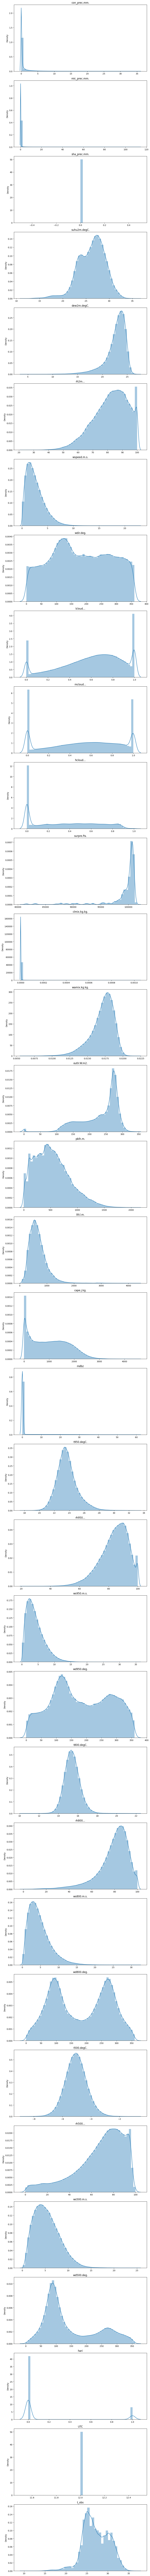

In [22]:
# Membuat subplot
plot_df = weather_processed.drop(columns=['lokasi', 'Nama UPT', 'LAT', 'LON', 'ELEV']).copy()
fig, axes = plt.subplots(len(plot_df.columns), 1, figsize=(10, 5 * len(plot_df.columns)))

# Memplotkan setiap kolom menggunakan distplot
for i, column in enumerate(plot_df.columns):
    sns.distplot(weather[column], ax=axes[i])
    axes[i].set_title(column)
    axes[i].set_xlabel('')

plt.tight_layout()
plt.show()

In [23]:
suhu2m_maimun_saleh = weather_processed.loc[weather_processed['Nama UPT'] == 'Stasiun Meteorologi Maimun Saleh']
suhu2m_maimun_saleh

,lokasi,con_prec.mm.,mic_prec.mm.,sha_prec.mm.,suhu2m.degC.,dew2m.degC.,rh2m...,wspeed.m.s.,wdir.deg.,lcloud...,mcloud...,hcloud...,surpre.Pa.,clmix.kg.kg.,wamix.kg.kg.,outlr.W.m2.,pblh.m.,lifcl.m.,cape.j.kg.,mdbz,t950.degC.,rh950...,ws950.m.s.,wd950.deg.,t800.degC.,rh800...,ws800.m.s.,wd800.deg.,t500.degC.,rh500...,ws500.m.s.,wd500.deg.,hari,UTC,LAT,LON,ELEV,t_obs,Nama UPT
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-02-27 15:00:00,96001,0.000000,0.000000e+00,0,27.3973,21.6059,70.8014,3.43326,12.4580,0.553781,0.00000,0.0,100564.0,0.0,0.014986,299.737,770.659,908.410,38.57470,0.0,22.3437,81.3926,3.51896,12.6254,17.0906,20.4601,0.767220,281.6220,-5.20890,11.0889,6.22327,57.5841,0,12,5.87655,95.33785,126,23.2,Stasiun Meteorologi Maimun Saleh
2021-02-27 18:00:00,96001,0.000000,0.000000e+00,0,27.0090,21.5161,72.0376,3.04901,27.2450,0.640686,0.00000,0.0,100481.0,0.0,0.015089,299.999,769.073,847.329,21.24180,0.0,22.0052,83.6853,3.12172,26.4370,17.4508,16.8533,0.653591,250.9690,-5.05963,12.7044,5.96761,59.9813,0,12,5.87655,95.33785,126,23.0,Stasiun Meteorologi Maimun Saleh
2021-02-27 21:00:00,96001,0.000000,0.000000e+00,0,26.5672,21.4226,73.5149,2.04556,37.3569,0.717464,0.00000,0.0,100265.0,0.0,0.015313,297.695,743.406,772.599,23.78600,0.0,21.7550,86.2461,2.08801,34.4898,17.3211,16.4506,0.823568,227.0300,-4.89987,15.2381,7.04134,67.3222,0,12,5.87655,95.33785,126,21.6,Stasiun Meteorologi Maimun Saleh
2021-02-28 00:00:00,96001,0.000000,0.000000e+00,0,26.4519,21.5400,74.5507,2.22508,20.1816,0.698006,0.00000,0.0,100462.0,0.0,0.015351,297.548,735.940,742.773,14.16860,0.0,21.4920,87.7783,1.94362,23.7710,16.8798,18.1771,0.492229,120.1200,-4.72228,16.3007,7.54606,65.4942,0,12,5.87655,95.33785,126,19.8,Stasiun Meteorologi Maimun Saleh
2021-02-28 03:00:00,96001,0.000000,0.000000e+00,0,26.7230,21.3691,72.6038,2.34268,14.7934,0.626203,0.00000,0.0,100667.0,0.0,0.015026,297.792,729.502,809.919,2.12278,0.0,21.6005,85.5920,2.59790,23.7966,16.8302,18.2255,1.688550,137.4190,-4.64246,19.0442,8.93947,73.4932,0,12,5.87655,95.33785,126,28.4,Stasiun Meteorologi Maimun Saleh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-12 21:00:00,96001,0.000181,2.521340e-10,0,27.5648,25.4250,88.2517,5.47214,229.0580,0.758010,0.00000,0.0,100561.0,0.0,0.019365,291.085,498.532,402.179,2280.46000,0.0,23.2769,89.6105,6.58782,227.9400,15.7091,59.9932,2.513150,97.9713,-3.94266,18.1874,5.23077,37.2362,1,12,5.87655,95.33785,126,26.9,Stasiun Meteorologi Maimun Saleh
2023-04-13 00:00:00,96001,0.669621,0.000000e+00,0,26.9044,25.2219,90.6400,5.55761,245.6290,0.914715,0.00000,0.0,100706.0,0.0,0.019147,292.135,417.006,317.544,1940.44000,0.0,22.9121,91.4402,6.25795,239.5850,15.5944,63.2563,2.907670,111.7730,-3.95491,21.7449,5.51392,50.4795,1,12,5.87655,95.33785,126,27.0,Stasiun Meteorologi Maimun Saleh
2023-04-13 15:00:00,96001,0.110796,0.000000e+00,0,28.6063,24.9508,80.7394,2.86711,300.4140,0.725273,0.02629,0.0,100844.0,0.0,0.018772,288.972,638.925,602.875,1987.67000,0.0,23.8241,92.3019,3.09350,296.3800,15.9221,73.6574,3.092390,70.9362,-4.25857,16.9670,4.96094,73.0856,0,12,5.87655,95.33785,126,27.6,Stasiun Meteorologi Maimun Saleh


<Axes: xlabel='Date'>

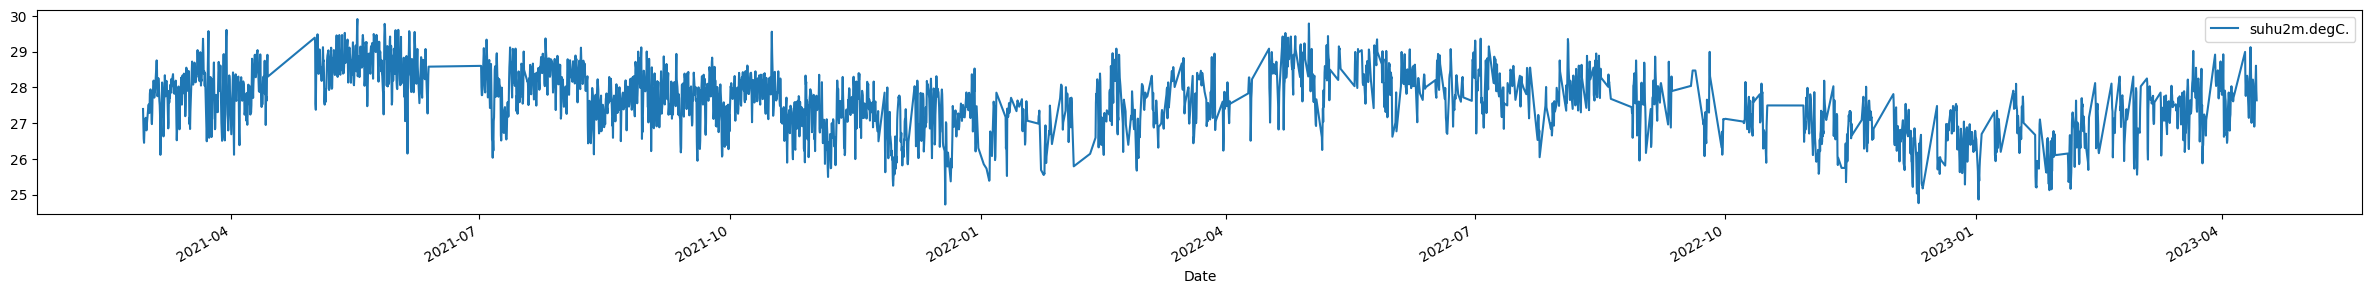

In [24]:
suhu2m_maimun_saleh[['suhu2m.degC.']].plot(figsize=(30,3))

In [28]:
(weather_processed['sha_prec.mm.'] == 0).sum()/weather_processed.shape[0]

1.0

In [29]:
(weather_processed['clmix.kg.kg.'] == 0).sum()/weather_processed.shape[0]

0.9507252898024217

In [30]:
(weather_processed['mdbz'] == 0).sum()/weather_processed.shape[0]

0.8957098545732168

In [31]:
(weather_processed['hari'] == 0).sum()/weather_processed.shape[0]

0.8394514869086389

In [33]:
weather_filtered = weather.drop(columns=['sha_prec.mm.', 'clmix.kg.kg.', 'mdbz', 'hari', 'UTC', 'LON', 'LAT'])

In [34]:
weather_filtered

,Date,lokasi,con_prec.mm.,mic_prec.mm.,suhu2m.degC.,dew2m.degC.,rh2m...,wspeed.m.s.,wdir.deg.,lcloud...,mcloud...,hcloud...,surpre.Pa.,wamix.kg.kg.,outlr.W.m2.,pblh.m.,lifcl.m.,cape.j.kg.,t950.degC.,rh950...,ws950.m.s.,wd950.deg.,t800.degC.,rh800...,ws800.m.s.,wd800.deg.,t500.degC.,rh500...,ws500.m.s.,wd500.deg.,ELEV,t_obs
1,2021-02-27 15:00:00,96001,0.000000,0.000000e+00,27.3973,21.6059,70.8014,3.433260,12.4580,0.553781,0.000000,0.000000,100564.0,0.014986,299.737,770.659,908.410,38.57470,22.3437,81.3926,3.51896,12.6254,17.0906,20.4601,0.767220,281.622,-5.20890,11.0889,6.22327,57.5841,126,23.2
2,2021-02-27 18:00:00,96001,0.000000,0.000000e+00,27.0090,21.5161,72.0376,3.049010,27.2450,0.640686,0.000000,0.000000,100481.0,0.015089,299.999,769.073,847.329,21.24180,22.0052,83.6853,3.12172,26.4370,17.4508,16.8533,0.653591,250.969,-5.05963,12.7044,5.96761,59.9813,126,23.0
3,2021-02-27 21:00:00,96001,0.000000,0.000000e+00,26.5672,21.4226,73.5149,2.045560,37.3569,0.717464,0.000000,0.000000,100265.0,0.015313,297.695,743.406,772.599,23.78600,21.7550,86.2461,2.08801,34.4898,17.3211,16.4506,0.823568,227.030,-4.89987,15.2381,7.04134,67.3222,126,21.6
4,2021-02-28 00:00:00,96001,0.000000,0.000000e+00,26.4519,21.5400,74.5507,2.225080,20.1816,0.698006,0.000000,0.000000,100462.0,0.015351,297.548,735.940,742.773,14.16860,21.4920,87.7783,1.94362,23.7710,16.8798,18.1771,0.492229,120.120,-4.72228,16.3007,7.54606,65.4942,126,19.8
5,2021-02-28 03:00:00,96001,0.000000,0.000000e+00,26.7230,21.3691,72.6038,2.342680,14.7934,0.626203,0.000000,0.000000,100667.0,0.015026,297.792,729.502,809.919,2.12278,21.6005,85.5920,2.59790,23.7966,16.8302,18.2255,1.688550,137.419,-4.64246,19.0442,8.93947,73.4932,126,28.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544270,2023-04-12 03:00:00,99992,0.003601,0.000000e+00,29.7642,23.4001,68.8035,3.721340,261.5040,0.390150,0.488739,0.327736,100401.0,0.017163,149.840,805.937,885.802,1304.62000,24.2240,83.3937,5.33461,257.7270,15.4080,86.8257,6.484750,260.471,-4.69787,73.0758,2.29511,231.9670,41,31.8
544271,2023-04-12 06:00:00,99992,3.669660,7.573590e-21,30.7901,24.1140,67.7143,5.811930,263.9440,0.536106,0.653845,0.377421,100234.0,0.018095,155.006,1075.000,913.548,2185.44000,25.3790,81.5219,7.73702,256.4770,15.5844,86.8180,7.014090,248.417,-4.63960,75.7922,2.05083,268.5790,41,35.0
544272,2023-04-12 09:00:00,99992,4.045040,2.640270e-09,28.8450,24.1964,76.1178,5.839920,268.8950,0.229447,0.570225,0.455976,100067.0,0.018342,126.417,566.484,735.727,1989.83000,25.0388,78.0417,10.21180,257.0560,15.7292,83.2283,8.068280,248.233,-4.40575,77.1489,2.52709,272.9220,41,30.6
544273,2023-04-12 12:00:00,99992,0.000000,0.000000e+00,25.8334,23.9709,89.6050,0.500122,210.7490,0.087511,0.292942,0.447494,100218.0,0.018011,146.682,227.432,564.794,1213.66000,24.9000,74.5380,7.96001,239.4350,15.8302,80.2176,7.675180,256.296,-4.33471,76.3170,3.07955,259.2500,41,28.4


In [117]:
train_size = 0.8

train = weather_filtered.loc[:train_size * len(weather_filtered)]
test = weather_filtered.loc[train_size * len(weather_filtered):]

print(train.shape)
print(test.shape)

(435419, 32)
(108855, 32)


In [118]:
predictor = train.drop(columns='t_obs')
predictor = predictor.set_index('Date')
predictor

,lokasi,con_prec.mm.,mic_prec.mm.,suhu2m.degC.,dew2m.degC.,rh2m...,wspeed.m.s.,wdir.deg.,lcloud...,mcloud...,hcloud...,surpre.Pa.,wamix.kg.kg.,outlr.W.m2.,pblh.m.,lifcl.m.,cape.j.kg.,t950.degC.,rh950...,ws950.m.s.,wd950.deg.,t800.degC.,rh800...,ws800.m.s.,wd800.deg.,t500.degC.,rh500...,ws500.m.s.,wd500.deg.,ELEV
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-02-27 15:00:00,96001,0.0,0.0,27.3973,21.6059,70.8014,3.43326,12.4580,0.553781,0.0,0.0,100564.0,0.014986,299.737,770.659,908.410,38.57470,22.3437,81.3926,3.51896,12.6254,17.0906,20.4601,0.767220,281.6220,-5.20890,11.08890,6.22327,57.5841,126
2021-02-27 18:00:00,96001,0.0,0.0,27.0090,21.5161,72.0376,3.04901,27.2450,0.640686,0.0,0.0,100481.0,0.015089,299.999,769.073,847.329,21.24180,22.0052,83.6853,3.12172,26.4370,17.4508,16.8533,0.653591,250.9690,-5.05963,12.70440,5.96761,59.9813,126
2021-02-27 21:00:00,96001,0.0,0.0,26.5672,21.4226,73.5149,2.04556,37.3569,0.717464,0.0,0.0,100265.0,0.015313,297.695,743.406,772.599,23.78600,21.7550,86.2461,2.08801,34.4898,17.3211,16.4506,0.823568,227.0300,-4.89987,15.23810,7.04134,67.3222,126
2021-02-28 00:00:00,96001,0.0,0.0,26.4519,21.5400,74.5507,2.22508,20.1816,0.698006,0.0,0.0,100462.0,0.015351,297.548,735.940,742.773,14.16860,21.4920,87.7783,1.94362,23.7710,16.8798,18.1771,0.492229,120.1200,-4.72228,16.30070,7.54606,65.4942,126
2021-02-28 03:00:00,96001,0.0,0.0,26.7230,21.3691,72.6038,2.34268,14.7934,0.626203,0.0,0.0,100667.0,0.015026,297.792,729.502,809.919,2.12278,21.6005,85.5920,2.59790,23.7966,16.8302,18.2255,1.688550,137.4190,-4.64246,19.04420,8.93947,73.4932,126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-07 15:00:00,97378,0.0,0.0,24.1272,18.6721,71.7015,7.07951,104.0790,0.388644,0.0,0.0,100212.0,0.013522,302.177,732.885,842.105,41.92190,20.7343,82.3249,14.22000,102.4400,13.3085,56.5750,12.097900,119.7660,-4.59115,3.04163,6.40639,210.7070,141
2021-09-07 18:00:00,97378,0.0,0.0,23.4978,19.0567,76.2822,5.90507,97.4446,0.463687,0.0,0.0,100104.0,0.013860,299.773,707.286,769.878,122.34600,20.7070,83.8496,12.95030,97.6789,12.6386,56.4413,12.958900,104.7710,-4.63987,2.41109,5.05794,228.5940,141
2021-09-07 21:00:00,97378,0.0,0.0,23.4406,18.9548,76.0604,5.82967,108.6670,0.163043,0.0,0.0,100168.0,0.013768,302.126,664.208,821.097,94.57430,21.1451,78.7311,12.61920,105.5440,12.5680,53.9004,11.558400,101.1420,-4.88477,1.40199,4.10419,230.4920,141


In [119]:
target = train[['Date', 't_obs']]
target = target.set_index('Date')
target

,t_obs
Date,
2021-02-27 15:00:00,23.2
2021-02-27 18:00:00,23.0
2021-02-27 21:00:00,21.6
2021-02-28 00:00:00,19.8
2021-02-28 03:00:00,28.4
...,...
2021-09-07 15:00:00,24.6
2021-09-07 18:00:00,24.0
2021-09-07 21:00:00,24.4


In [120]:
from sklearn.ensemble import ExtraTreesRegressor

etr = ExtraTreesRegressor(random_state=42, verbose=1)

In [121]:
etr.fit(predictor, target)

C:\Users\Nycht\AppData\Local\Temp\ipykernel_15680\9665590.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  etr.fit(predictor, target)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  7.6min finished


ExtraTreesRegressor(random_state=42, verbose=1)

In [126]:
test_predictor = test.drop(columns=['t_obs'])
test_predictor = test_predictor.set_index('Date')
test_predictor

,lokasi,con_prec.mm.,mic_prec.mm.,suhu2m.degC.,dew2m.degC.,rh2m...,wspeed.m.s.,wdir.deg.,lcloud...,mcloud...,hcloud...,surpre.Pa.,wamix.kg.kg.,outlr.W.m2.,pblh.m.,lifcl.m.,cape.j.kg.,t950.degC.,rh950...,ws950.m.s.,wd950.deg.,t800.degC.,rh800...,ws800.m.s.,wd800.deg.,t500.degC.,rh500...,ws500.m.s.,wd500.deg.,ELEV
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-09-08 06:00:00,97378,0.000000,0.000000e+00,29.8222,16.0221,43.3802,9.620180,110.2320,0.000000,0.000000,0.000000,99931.2,0.011503,328.776,1086.310,1583.480,9.27818,23.4889,55.1280,13.02750,108.1040,14.1490,51.3741,11.52180,73.2636,-4.33181,2.27077,4.26774,237.845,141
2021-09-08 09:00:00,97378,0.000000,0.000000e+00,27.3410,17.3331,54.4635,9.375300,104.7090,0.000000,0.000000,0.000000,99972.4,0.012499,306.695,762.150,1235.810,13.55680,22.4653,67.2507,14.10260,102.4000,14.9304,45.4825,9.82500,69.9017,-4.20420,4.12294,3.63434,230.599,141
2021-09-08 15:00:00,97378,0.000000,0.000000e+00,24.9314,20.5364,76.7173,7.142340,92.5274,0.713963,0.000000,0.000000,100262.0,0.015184,290.206,752.774,693.918,64.33350,21.3166,88.6548,15.33900,92.8010,14.1066,60.4210,12.02170,81.1958,-3.98435,18.36510,4.94887,294.620,141
2021-09-08 18:00:00,97378,0.000000,0.000000e+00,24.3937,20.6126,79.5986,5.959310,90.8481,0.332491,0.000000,0.000000,100109.0,0.015274,289.271,767.042,684.612,155.38300,21.6551,83.2919,14.11570,89.4659,14.5303,56.3369,12.85770,83.9015,-4.19079,21.79230,6.11776,301.578,141
2021-09-08 21:00:00,97378,0.000000,0.000000e+00,24.0305,20.4877,80.7293,5.049740,90.1197,0.295602,0.145177,0.000000,100213.0,0.015146,289.239,568.982,710.950,179.61700,21.9246,81.0883,12.32540,88.2740,14.1282,53.6119,13.45710,75.8116,-4.11705,26.40760,6.25179,297.216,141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-12 03:00:00,99992,0.003601,0.000000e+00,29.7642,23.4001,68.8035,3.721340,261.5040,0.390150,0.488739,0.327736,100401.0,0.017163,149.840,805.937,885.802,1304.62000,24.2240,83.3937,5.33461,257.7270,15.4080,86.8257,6.48475,260.4710,-4.69787,73.07580,2.29511,231.967,41
2023-04-12 06:00:00,99992,3.669660,7.573590e-21,30.7901,24.1140,67.7143,5.811930,263.9440,0.536106,0.653845,0.377421,100234.0,0.018095,155.006,1075.000,913.548,2185.44000,25.3790,81.5219,7.73702,256.4770,15.5844,86.8180,7.01409,248.4170,-4.63960,75.79220,2.05083,268.579,41
2023-04-12 09:00:00,99992,4.045040,2.640270e-09,28.8450,24.1964,76.1178,5.839920,268.8950,0.229447,0.570225,0.455976,100067.0,0.018342,126.417,566.484,735.727,1989.83000,25.0388,78.0417,10.21180,257.0560,15.7292,83.2283,8.06828,248.2330,-4.40575,77.14890,2.52709,272.922,41


In [128]:
test_target = test[['Date', 't_obs']]
test_target = test_target.set_index('Date')
test_target

,t_obs
Date,
2021-09-08 06:00:00,29.0
2021-09-08 09:00:00,28.0
2021-09-08 15:00:00,26.0
2021-09-08 18:00:00,26.0
2021-09-08 21:00:00,25.2
...,...
2023-04-12 03:00:00,31.8
2023-04-12 06:00:00,35.0
2023-04-12 09:00:00,30.6


In [129]:
prediction = etr.predict(test_predictor)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.6s finished


In [130]:
print(f'MSE : {mean_squared_error(test_target, prediction)}')
print(f'MAE : {mean_absolute_error(test_target, prediction)}')
print(f'R2 : {r2_score(test_target, prediction)}')

MSE : 3.048834001758008
MAE : 1.386024204140064
R2 : 0.70119667973306


In [132]:
combined = pd.concat([test_target, pd.Series(prediction, index = test_predictor.index)], axis=1)
combined.columns = ['actual', 'prediction']

In [133]:
combined.tail(50)

,actual,prediction
Date,,
2023-03-26 00:00:00,25.0,25.376
2023-03-26 03:00:00,29.0,30.013
2023-03-26 06:00:00,33.0,30.387
2023-03-26 09:00:00,31.7,29.231
2023-03-30 00:00:00,24.0,24.925
2023-03-30 03:00:00,29.4,29.384
2023-03-30 06:00:00,32.4,29.453
2023-03-30 09:00:00,28.6,28.050
2023-03-30 12:00:00,27.6,26.599


In [136]:
test_target.index

Index(['2021-09-08 06:00:00', '2021-09-08 09:00:00', '2021-09-08 15:00:00',
       '2021-09-08 18:00:00', '2021-09-08 21:00:00', '2021-09-09 00:00:00',
       '2021-09-09 03:00:00', '2021-09-09 06:00:00', '2021-09-09 09:00:00',
       '2021-09-09 15:00:00',
       ...
       '2023-04-11 00:00:00', '2023-04-11 03:00:00', '2023-04-11 06:00:00',
       '2023-04-11 09:00:00', '2023-04-12 00:00:00', '2023-04-12 03:00:00',
       '2023-04-12 06:00:00', '2023-04-12 09:00:00', '2023-04-12 12:00:00',
       '2023-04-13 00:00:00'],
      dtype='object', name='Date', length=108855)

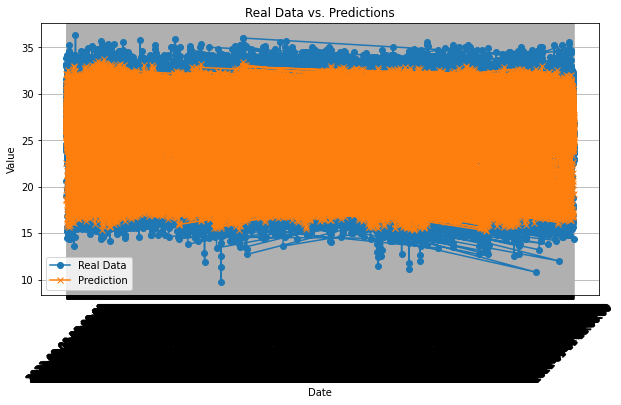

In [135]:
plt.figure(figsize=(10, 5))
plt.plot(test_target.index, test_target, label='Real Data', marker='o')
plt.plot(test_target.index, prediction, label='Prediction', marker='x')

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Real Data vs. Predictions')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend()
plt.grid(True)

plt.show()